In [249]:
import pandas as pd
import os
import plotly.express as px
import numpy as np

In [84]:
path = '../data/bsta_homologs/viking/tables/'
all_dfs = []
for file in os.listdir(path):
    if file.endswith('.tsv'):
        filepath = os.path.join(path, file)
        df_tmp = pd.read_csv(filepath, sep='\t')
        df_tmp['file'] = [file] * len(df_tmp)
        df_tmp = df_tmp.sort_values(by=['query_name','full_score'], ascending=[True, False])
        df = df_tmp.drop_duplicates(subset='query_name')
        all_dfs.append(df)

In [90]:
df_all = pd.concat(all_dfs)

In [215]:
df_all.head()

,target_name,acc,target_len,query_name,acc_2,query_len,full_evalue,full_score,full_bias,dom_num,...,dom_score,dom_bias,hmm_from,hmm_to,ali_from,ali_to,env_from,env_to,acc3,file
0,HTH_Tnp_1,PF01527.20,75,HJKFIDMD_00003,-,167,4.500000e-14,52.5,1.4,1,...,23.3,0.0,7,59,11,64,8,68,0.81,NZ_CAADJH010000002.1_1520985-1521881.tsv
25,rve,PF00665.26,119,HJKFIDMD_00004,-,283,1.400000e-23,83.3,0.1,1,...,-3.0,0.0,73,101,31,60,7,63,0.65,NZ_CAADJH010000002.1_1520985-1521881.tsv
35,DUF4062,PF13271.6,83,HJKFIDMD_00005,-,321,4.500000e-27,94.2,0.0,1,...,92.8,0.0,1,83,6,88,6,88,0.99,NZ_CAADJH010000002.1_1520985-1521881.tsv
49,Ogr_Delta,PF04606.12,47,HJKFIDMD_00006,-,90,1.900000e-15,56.6,4.3,1,...,56.0,4.3,1,47,4,50,4,50,0.97,NZ_CAADJH010000002.1_1520985-1521881.tsv
60,Psu,PF07455.11,174,HJKFIDMD_00007,-,253,5.600000e-02,13.0,5.9,1,...,3.1,2.8,2,32,18,48,17,98,0.85,NZ_CAADJH010000002.1_1520985-1521881.tsv


## Bars

In [135]:
annot = pd.DataFrame(df_all['target_name'].value_counts())
annot.columns=['count']
annot = annot[annot['count'] > 10]

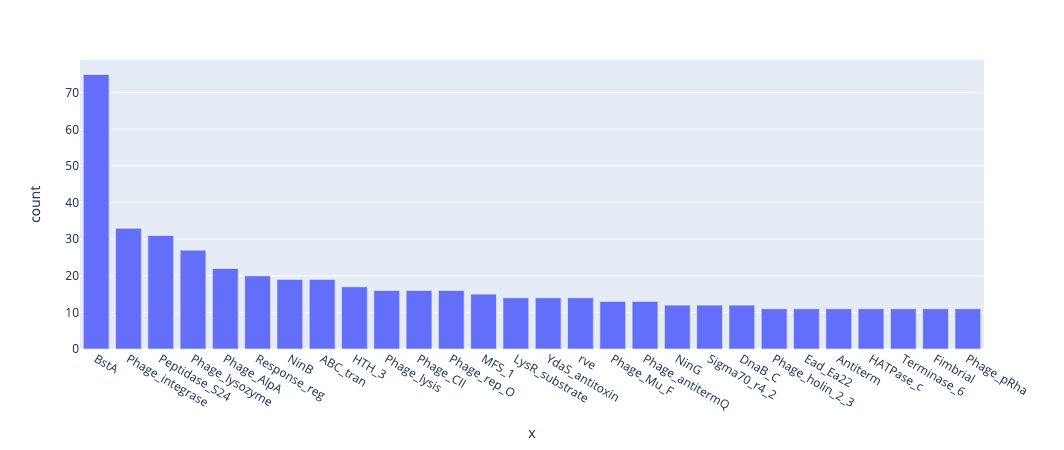

In [136]:
fig = px.bar(annot, x=annot.index, y='count')
fig.show()

## BstA scores

In [165]:
bsta_scores = pd.DataFrame(df_all[df_all['target_name'] == 'BstA'].set_index('file')['full_score'])

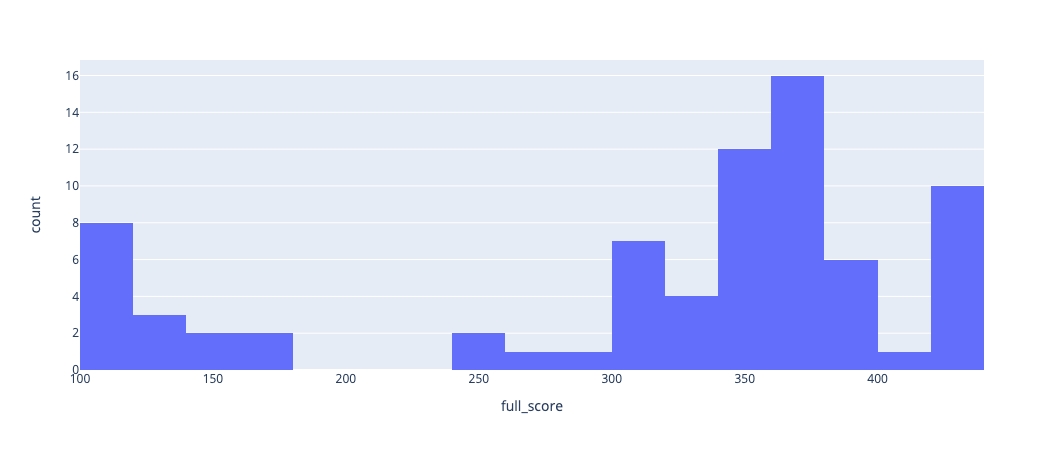

In [166]:
fig = px.histogram(bsta_scores, x='full_score', nbins=20)
fig.show()

# Excel

In [153]:
df_xls = pd.read_excel('../data/Curated homolog list.xlsx')

In [154]:
df_xls = df_xls[df_xls['Accession'].notnull()]
df_xls['Hit start'] = df_xls['Hit start'].astype(int)
df_xls['Hit end'] = df_xls['Hit end'].astype(int)

In [183]:
df_xls['file'] = df_xls['Accession'] + '_' + df_xls['Hit start'].astype(str) + '-' + df_xls['Hit end'].astype(str) + '.tsv'
df_xls = df_xls.set_index('file')

In [187]:
j = df_xls.join(bsta_scores, how='left', on='file')

In [201]:
de = j[j['full_score'].notnull()]
de = de.sort_values(by='full_score')

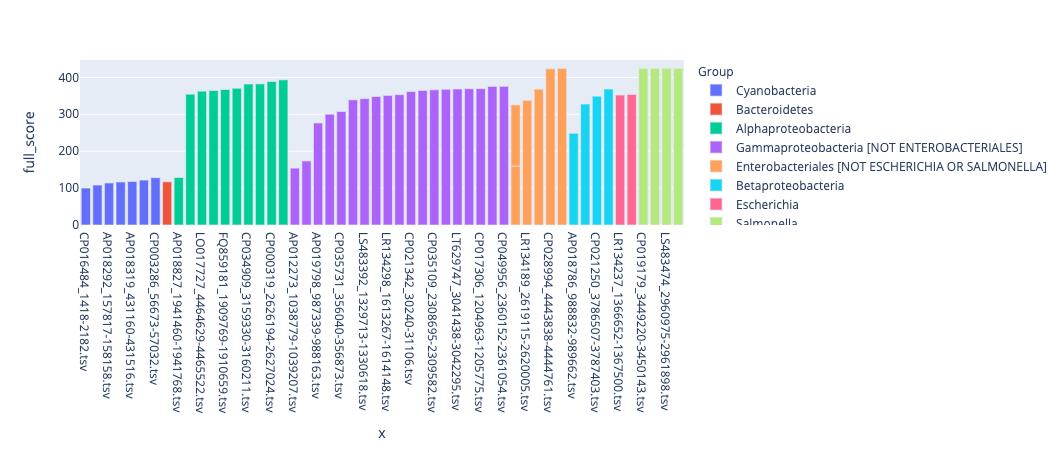

In [214]:
fig = px.bar(de, x=de.index, y='full_score', color='Group')
fig.show()

## Pivot

In [232]:
cond = df_all[['target_name', 'acc', 'query_name', 'full_score', 'file']].copy()
cond['presence'] = [1] * len(cond)

In [233]:
cond

,target_name,acc,query_name,full_score,file,presence
0,HTH_Tnp_1,PF01527.20,HJKFIDMD_00003,52.5,NZ_CAADJH010000002.1_1520985-1521881.tsv,1
25,rve,PF00665.26,HJKFIDMD_00004,83.3,NZ_CAADJH010000002.1_1520985-1521881.tsv,1
35,DUF4062,PF13271.6,HJKFIDMD_00005,94.2,NZ_CAADJH010000002.1_1520985-1521881.tsv,1
49,Ogr_Delta,PF04606.12,HJKFIDMD_00006,56.6,NZ_CAADJH010000002.1_1520985-1521881.tsv,1
60,Psu,PF07455.11,HJKFIDMD_00007,13.0,NZ_CAADJH010000002.1_1520985-1521881.tsv,1
...,...,...,...,...,...,...
228,N6_N4_Mtase,PF01555.18,CBGIPBMI_00038,103.1,CP007502_1285446-1286351.tsv,1
235,ResIII,PF04851.15,CBGIPBMI_00039,48.0,CP007502_1285446-1286351.tsv,1
240,SNF2_N,PF00176.23,CBGIPBMI_00041,119.9,CP007502_1285446-1286351.tsv,1
263,RBFA,PF02033.18,CBGIPBMI_00042,110.2,CP007502_1285446-1286351.tsv,1


In [242]:
matrix = pd.pivot_table(cond,
                    values='presence',
                    index=['target_name'],
                    columns='file')
matrix = matrix.fillna(0)

In [246]:
matrix10 = matrix[matrix.sum(axis=1) > 5]

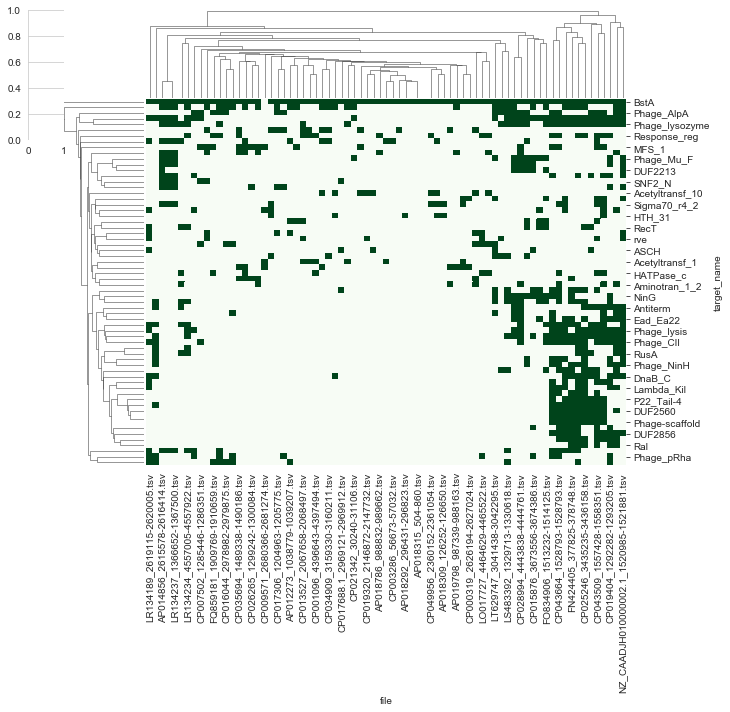

In [247]:
import seaborn as sns
sns.set_style("whitegrid")
clustermap = sns.clustermap(matrix10.fillna(0), cmap="Greens", cbar=False)

In [250]:
df_m = clustermap.data2d
df_m = df_m.replace(0, np.nan)

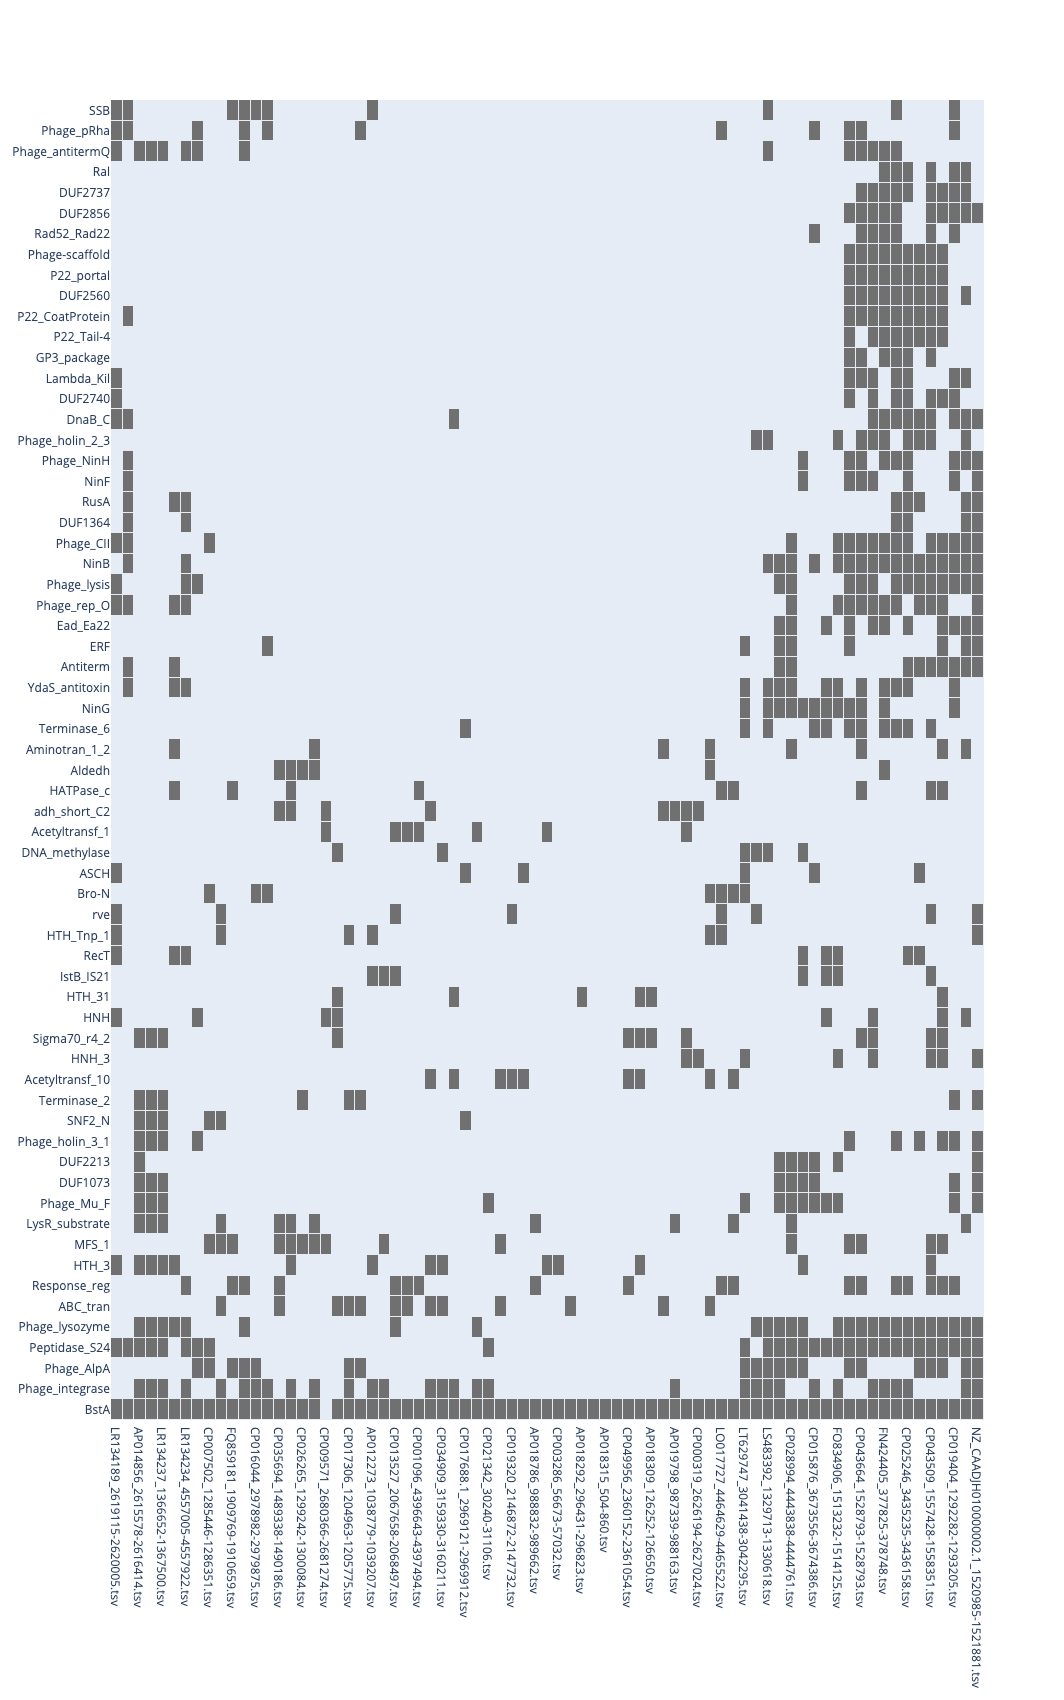

In [252]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=df_m.values,
                                x=df_m.columns,
                                y=df_m.index,
                                hoverongaps = False,
                                hoverinfo='y+x',
                                colorscale='gray',
                                ygap=1,
                                xgap=1,
                                showscale=False))

fig.update_layout(width = 1000, height = 1700,
                  xaxis={'showgrid':False},
                  yaxis={'showgrid':False},
                  autosize=False,
                  showlegend=False)
fig.show()

In [254]:
df[df['Accession'] == 'CP009571']

,Strain,Accession,Hit start,Hit end,Strand,Hit gene ID,Hit gene protein id,Taxonoomy,Phage?,Annotation of hit gene,Group,Unnamed: 11
24,Sphingomonas taxi strain ATCC 55669,CP009571,2680366.0,2681274.0,+,NaN,NaN,Bacteria; Proteobacteria; Alphaproteobacteria;...,NaN,NaN,Alphaproteobacteria,NaN
